# Anomaly Detection

In [ ]:
#обнаружение аномалий в датасете
!pip install pyod -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
'''
matplotlib - *tkinter*, основная библиотека, Figure (axes, subplots), numpy
seaborn - внутри matplotlib + дополнительные библиотеки и обёртки
plotly - d3.js + seaborn + matplotlib + дополнительные библиотеки и обёртки
*altair - matplotlib + дополнительные эффекты
'''

Figure(1000x400)
Axes(0.547727,0.11;0.352273x0.77)
Axes(0.125,0.11;0.352273x0.77)


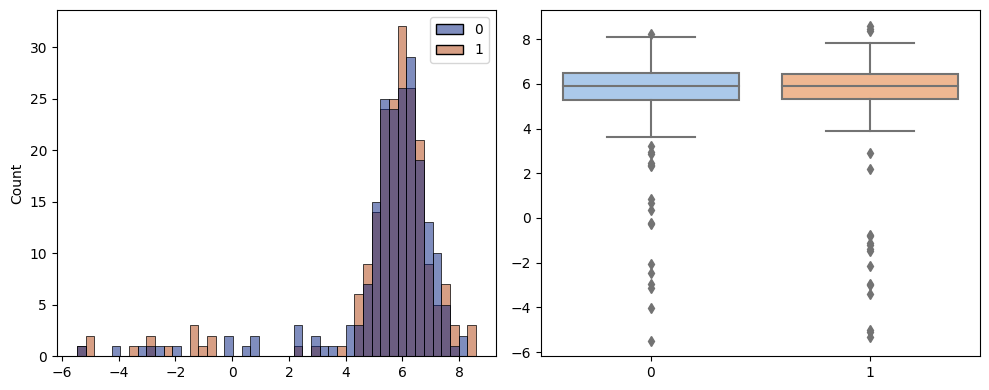

In [ ]:
from pyod.utils.data import generate_data

import matplotlib.pyplot as plt
import seaborn as sns

# создание данных для датасета
contamination = 0.1  # percentage of outliers
n_train = 200  # number of training points
n_test = 100  # number of testing points

X_train, X_test, y_train, y_test = generate_data(
    n_train=n_train, n_test=n_test, n_features=2, contamination=contamination, random_state=42)

# figsize=(10,4) 1000 на 400, по умолчанию 640x480
# nrows=1 - 1 строка (все графики горизонтально)
# ncols=2 - 2 столбца (2 графика)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
print(fig)
print(axes[1])
print(axes[0])

# my_colors = {'group1': 'red', 'group2': 'purple'}
sns.boxplot(data=X_train, ax=axes[1], palette="pastel")
sns.histplot(X_train, ax=axes[0], palette="dark")
plt.tight_layout()

In [ ]:
import numpy as np

test01 = np.arange(0, 50, 3)
print(test01)

test02, step = np.linspace(0,100,200, retstep=True)
print(test02)
print(step)

[ 0  3  6  9 12 15 18 21 24 27 30 33 36 39 42 45 48]
[  0.           0.50251256   1.00502513   1.50753769   2.01005025
   2.51256281   3.01507538   3.51758794   4.0201005    4.52261307
   5.02512563   5.52763819   6.03015075   6.53266332   7.03517588
   7.53768844   8.04020101   8.54271357   9.04522613   9.54773869
  10.05025126  10.55276382  11.05527638  11.55778894  12.06030151
  12.56281407  13.06532663  13.5678392   14.07035176  14.57286432
  15.07537688  15.57788945  16.08040201  16.58291457  17.08542714
  17.5879397   18.09045226  18.59296482  19.09547739  19.59798995
  20.10050251  20.60301508  21.10552764  21.6080402   22.11055276
  22.61306533  23.11557789  23.61809045  24.12060302  24.62311558
  25.12562814  25.6281407   26.13065327  26.63316583  27.13567839
  27.63819095  28.14070352  28.64321608  29.14572864  29.64824121
  30.15075377  30.65326633  31.15577889  31.65829146  32.16080402
  32.66331658  33.16582915  33.66834171  34.17085427  34.67336683
  35.1758794   35.67839

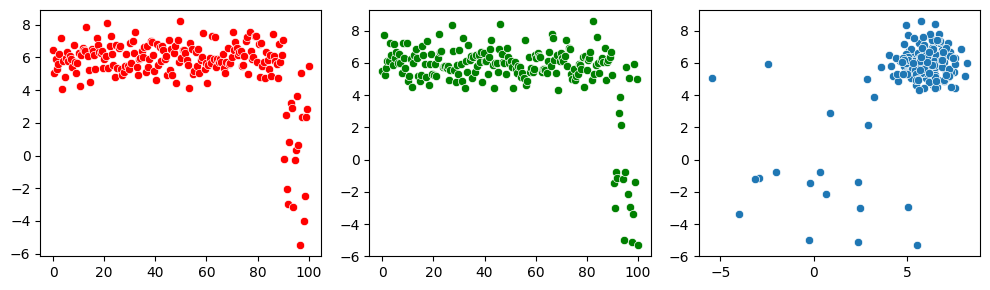

In [ ]:
import numpy as np
# (Figure, Axes)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,3))

#seaborn точечный график
sns.scatterplot(y=X_train[:,0], x=np.linspace(0,100,200), ax=axes[0], color='r')
sns.scatterplot(y=X_train[:,1], x=np.linspace(0,100,200), ax=axes[1], color='g')
sns.scatterplot(x=X_train[:,0], y=X_train[:,1], ax=axes[2])

plt.tight_layout()

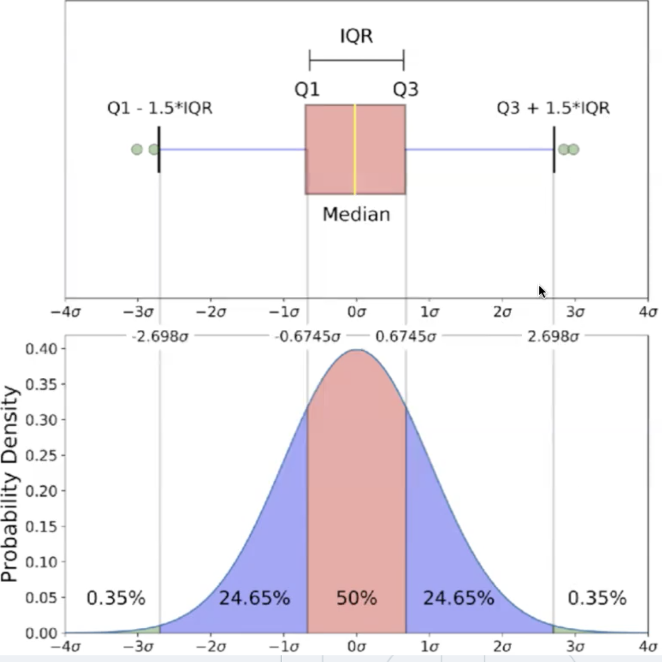

In [ ]:
# 3 sigma 99.7%
def sigma_outlier(X, y=False, threshold=3):
    sd = np.std(X, axis=0)
    mean = np.mean(X, axis=0)
    upper = mean + threshold * sd
    lower = mean - threshold * sd
    idx = np.where((X < lower) | (X > upper))[0]
    mask = np.ones(X.shape[0], dtype=int)
    mask[idx] = -1
    if y:
        return X[mask == 1], y[mask == 1]
    return X[mask == 1]

(188, 2)


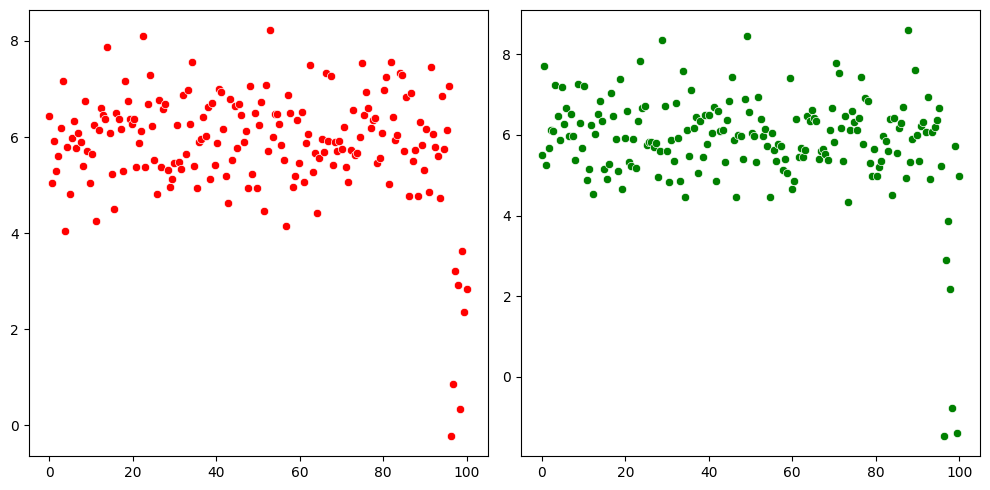

In [ ]:
X = sigma_outlier(X_train)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
print(X.shape)
sns.scatterplot(y=X[:,0], x=np.linspace(0,100,X.shape[0]), ax=axes[0], color='r')
sns.scatterplot(y=X[:,1], x=np.linspace(0,100,X.shape[0]), ax=axes[1], color='g')

plt.tight_layout()

In [ ]:
# IQR 99.3%
def iqr_outlier(X, y=False):
    Q3 = np.quantile(X, 0.75, axis=0)
    Q1 = np.quantile(X, 0.25, axis=0)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    idx = np.where((X < lower) | (X > upper))[0]
    mask = np.ones(X.shape[0], dtype=int)
    mask[idx] = -1
    if y:
        return X[mask == 1], y[mask == 1]
    return X[mask == 1]

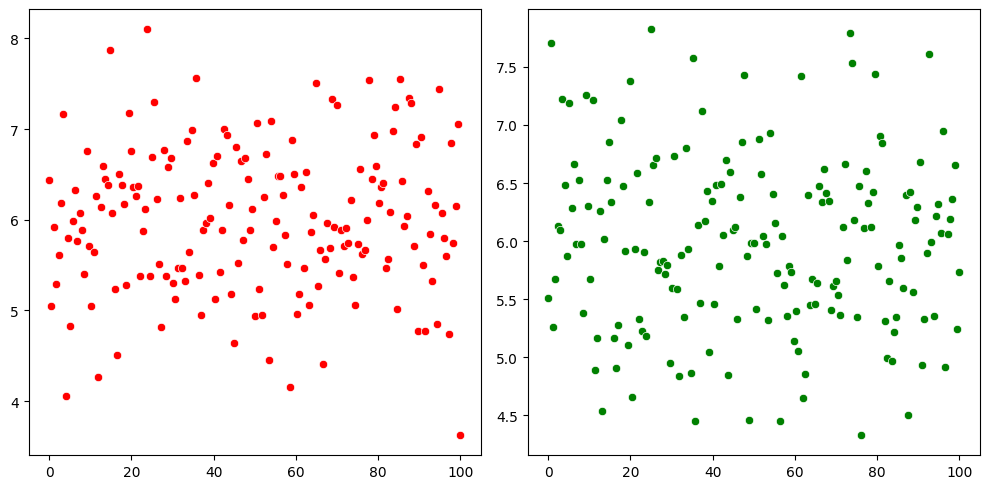

In [ ]:
X = iqr_outlier(X_train)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
sns.scatterplot(y=X[:,0], x=np.linspace(0,100,X.shape[0]), ax=axes[0], color='r')
sns.scatterplot(y=X[:,1], x=np.linspace(0,100,X.shape[0]), ax=axes[1], color='g')

plt.tight_layout()

# KNN method

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs



In [ ]:
n_groups=3
n_samples=160

# X, y = make_moons(n_samples=100, random_state=42)
X, y = make_blobs(n_samples=n_samples, centers=n_groups)
print(y)

[2 2 2 0 2 1 0 1 0 2 2 1 2 1 1 1 2 0 2 2 0 2 1 0 2 0 1 0 1 2 0 1 1 2 1 0 2
 2 1 0 0 0 0 1 1 1 1 1 2 0 0 1 1 1 2 0 0 0 0 2 1 0 0 1 1 0 2 1 2 2 1 1 2 1
 2 0 1 2 1 2 1 2 0 2 1 2 1 0 0 0 0 0 2 0 1 2 0 1 2 0 2 1 0 1 0 1 0 2 2 1 0
 1 0 0 2 1 2 2 2 0 2 0 2 0 0 2 2 2 2 0 0 1 0 1 2 2 2 0 2 1 2 2 1 1 1 0 0 0
 1 0 0 0 1 0 1 1 2 2 1 1]


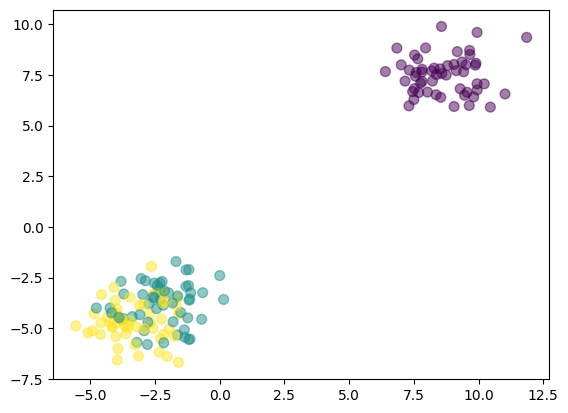

In [ ]:
#alpha - прозрачность, 0.5 = 50% прозрачности
#s - size
#c - color
plt.scatter(X[:,0], X[:,1], s=50, c=y, alpha=0.5)
plt.show()

<Axes: >

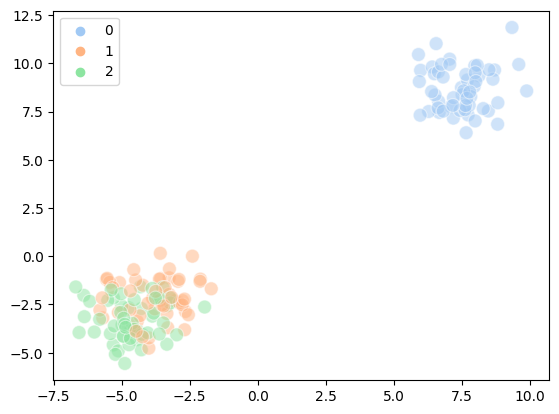

In [ ]:
sns.scatterplot(y=X[:,1], x=X[:,0], hue=y, palette='pastel', alpha=0.5, s=100)

In [ ]:
#подготовка тестового и тренировочного наборов данных
from sklearn.model_selection import train_test_split
# (X_train, X_test, y_train, y_test)
# test_size - 20% процентов выборки, 20%,25%,30%
# random_state - seed для генератора случайных чисел
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 2)
(40, 2)
(120,)
(40,)


In [ ]:
#подключение классификатора KNN
from sklearn.neighbors import KNeighborsClassifier
n_neighbors=5

model = KNeighborsClassifier(n_neighbors = n_neighbors)
model.fit(X_train,y_train)

score = model.score(X_test,y_test) # качество модели
print("The accuracy is ",score*100) # A, P, R, E

The accuracy is  75.0


In [ ]:
y_pred = model.predict(X_test)
y_pred == y_test

array([ True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True,  True, False,  True,  True,  True, False, False,
        True, False,  True,  True, False,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True, False,  True])

In [ ]:
!pip install mlxtend --upgrade --no-deps -q

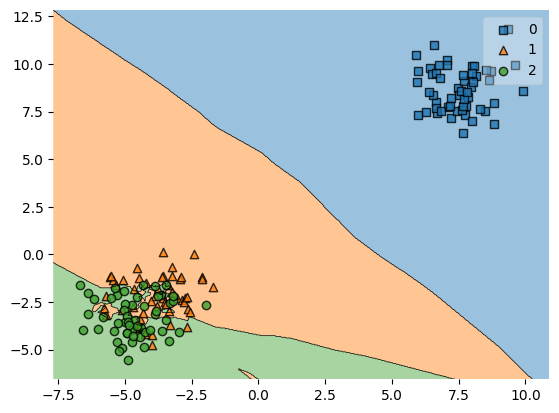

In [ ]:

from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y, clf=model)
plt.show()

# KNN method, try k = 3

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
n_neighbors=3

model = KNeighborsClassifier(n_neighbors = n_neighbors)
model.fit(X_train,y_train)

score = model.score(X_test,y_test)
print("The accuracy is ",score*100)

The accuracy is  75.0


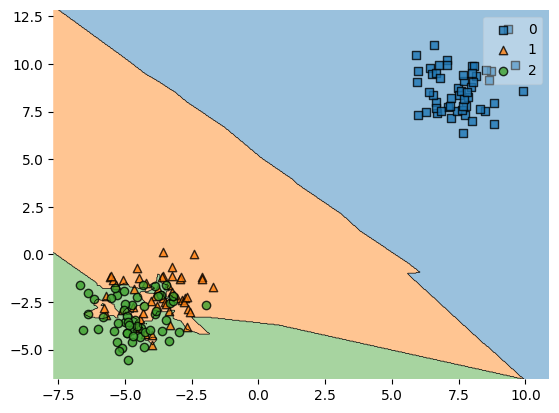

In [ ]:
plot_decision_regions(X, y, clf=model)
plt.show()

# Find optimal K using cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
# Создание списка значений k, которые вы хотите оценить
k_values = [3, 5, 7, 9, 10, 11, 20]

# Инициализация списка для сохранения средних оценок точности для каждого значения k
mean_scores = []

# Перебор значений k
for k in k_values:
    # Создание модели k-ближайших соседей
    knn = KNeighborsClassifier(n_neighbors=k)

    # Вычисление средней оценки точности с использованием перекрестной проверки
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')  # cv=5 означает 5-кратную перекрестную проверку
    mean_scores.append(np.mean(scores))

# Вывод результатов
for k, score in zip(k_values, mean_scores):
    print("k =", k, "Mean Accuracy:", score)






k = 3 Mean Accuracy: 0.7125
k = 5 Mean Accuracy: 0.775
k = 7 Mean Accuracy: 0.7625
k = 9 Mean Accuracy: 0.76875
k = 10 Mean Accuracy: 0.76875
k = 11 Mean Accuracy: 0.76875
k = 20 Mean Accuracy: 0.78125


In [ ]:
y_predict = model.predict(X_test)
print(y_predict)

[2 0 1 0 2 1 1 1 0 1 0 1 2 1 2 0 1 1 2 1 1 0 1 1 1 2 1 0 2 0 2 1 1 2 0 0 1
 2 1 0]


In [ ]:
# метрики
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,mean_absolute_error,classification_report

y_pred

print(model.get_params())

print("Accuracy: "+str(round(accuracy_score(y_test,y_predict),3)))
print("Precision: "+str(round(precision_score(y_test,y_predict, average='weighted',zero_division=0),3)))
print("Recall: "+str(round(recall_score(y_test,y_predict, average='weighted',zero_division=0),3)))
print("Mean absolute error: "+str(round(mean_absolute_error(y_test,y_predict),3)))
print("F1: "+str(round(f1_score(y_test,y_predict, average='weighted',zero_division=0),3)))

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
Accuracy: 0.75
Precision: 0.746
Recall: 0.75
Mean absolute error: 0.25
F1: 0.746


-1227.4357760151493x + 13.526927311471521
$-1.3867892354769593e+60x^6 + 5.476726273883531e+57x^5 + 9.680179525777844e+54x^4 + -1.685916799116172e+52x^3 + -1.1405731081438293e+50x^2 + -1.9617580549480274e+47x + 3.3594311049070603e+44$
$-2.0851459002657418ln(x) + -1.9446135228953296$
$2.5397769104196413e^-106.02991923547684x$


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


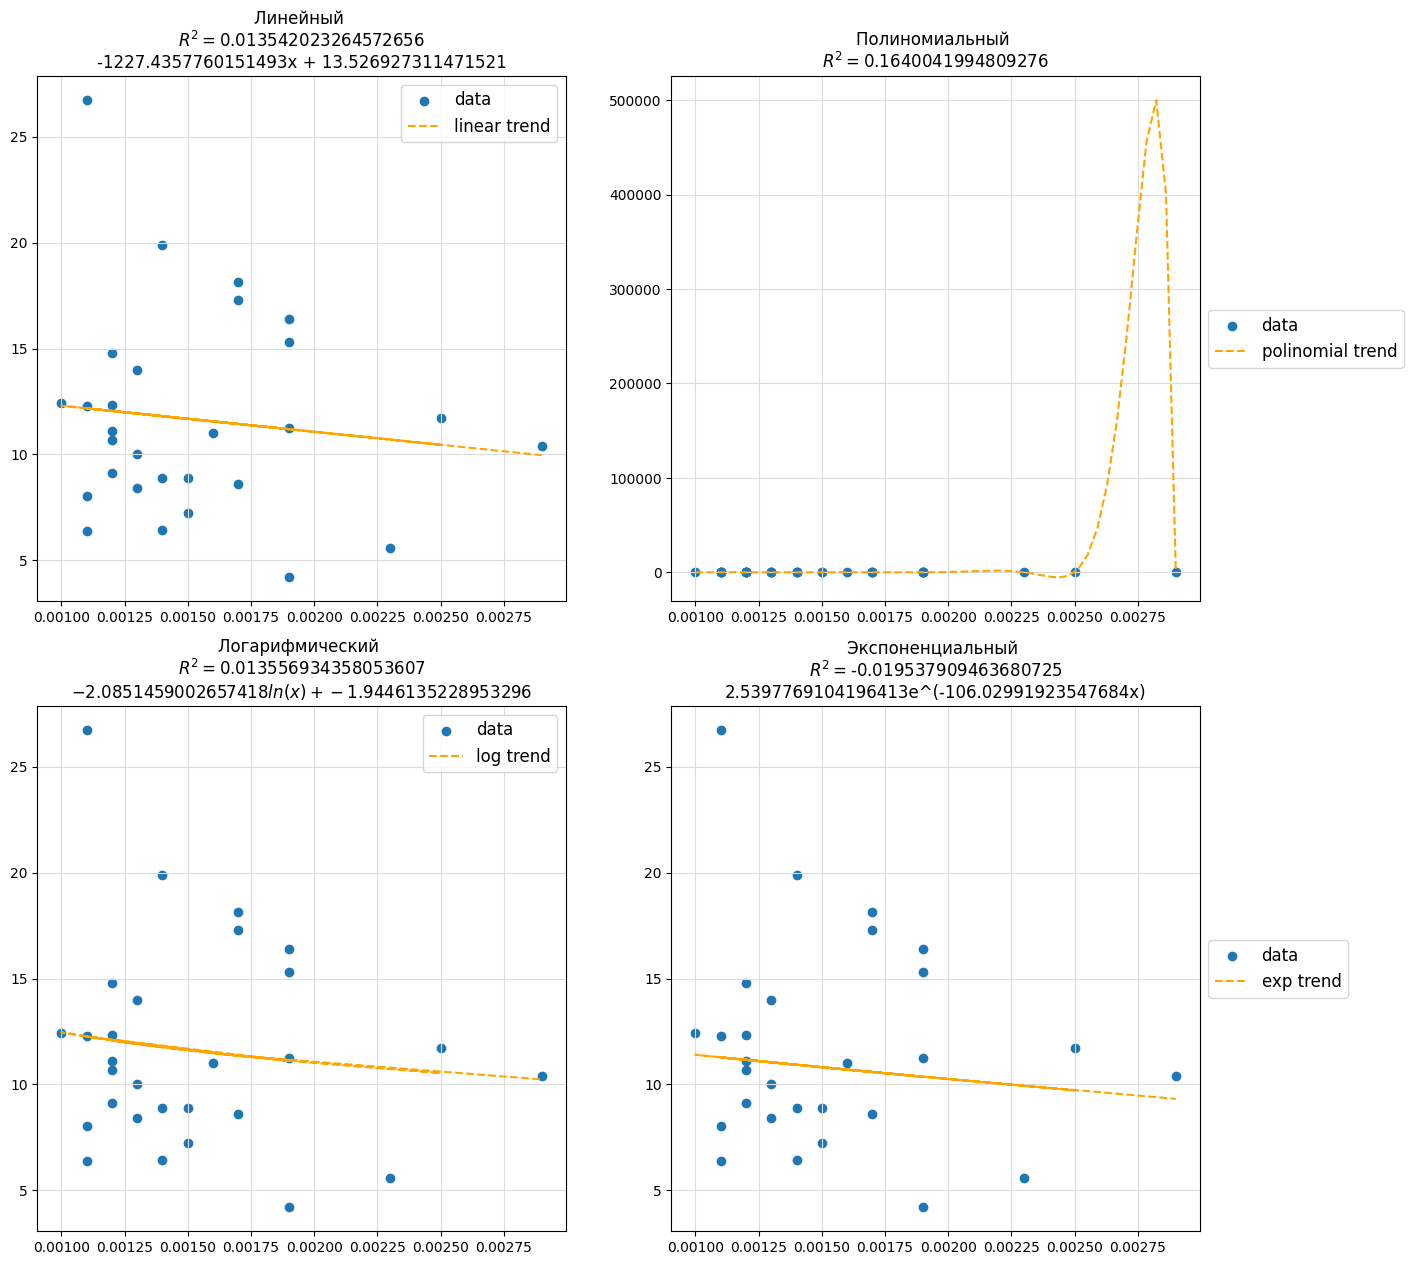

In [ ]:
# Полностью автоматическое создание трендов с matplotlib
import matplotlib.pyplot as plt # импортируем построитель графиков из библиотеки matplotlib
import numpy as np # импортируем библиотеку numpy для работы с массивами numpy
from sklearn.metrics import r2_score # функция для расчёта критерия r^2

# Массивы входных данных
x = [0.0012, 0.0015, 0.0012, 0.0012, 0.0012, 0.0013, 0.0012, 0.0014, 0.0014, 0.0013, 0.001, 0.0011,
      0.0011, 0.0014, 0.0016, 0.0019, 0.0017, 0.0013, 0.0011, 0.0017, 0.0011, 0.0019, 0.0015,
      0.0019, 0.0019, 0.0023, 0.0025, 0.0017, 0.0029]
y = [10.7, 7.22, 14.8, 12.35, 9.15, 8.42, 11.1, 19.9, 6.46, 10, 12.41, 8.05, 12.3, 8.9, 11,
      4.2, 17.3, 14, 6.37, 18.12, 26.72, 16.4, 8.91, 15.3, 11.24, 5.61, 11.7, 8.63, 10.4]

# Массивы numpy по входным данным
numpy_x = np.array(x)
numpy_y = np.array(y)

# Линии тренда
# линейный (автоматическое создание)
set_line_by_data = np.polyfit(numpy_x, numpy_y, 1) # полином первой степени
linear_trend = np.poly1d(set_line_by_data) # снижение размерности до одномерного массива
print("{0}x + {1}".format(*set_line_by_data)) # формула

# полиномиальный
set_polinom_by_data = np.polyfit(numpy_x, numpy_y, 20) # работа с полиномом 6 степени
polinom_trend = np.poly1d(set_polinom_by_data) # Рассчитать значение полинома в точках x
print("${0}x^6 + {1}x^5 + {2}x^4 + {3}x^3 + {4}x^2 + {5}x + {6}$".format(*set_polinom_by_data)) # формула

# логарифмический
set_log_by_data = np.polyfit(np.log(numpy_x), numpy_y, 1) # работа с полиномом 1 степени + логарифмирование x
log_trend = [set_log_by_data[0]*np.log(x) + set_log_by_data[1] for x in numpy_x] # создание одномерного массива для логарифмического тренда
print("${0}ln(x) + {1}$".format(*set_log_by_data))  # формула

# экспоненциальный
set_exp_by_data = np.polyfit(numpy_x, np.log(numpy_y), 1) # работа с полиномом 1 степени + логарифмирование
exp_trend = [np.exp(set_exp_by_data[1]) * np.exp(set_exp_by_data[0] * x) for x in numpy_x] # создание одномерного массива для экспоненциального тренда
print("${1}e^{0}x$".format(*set_exp_by_data))  # формула

# Расчёт R^2
linear_r2 = r2_score(numpy_y, linear_trend(numpy_x))
polinom_r2 = r2_score(numpy_y, polinom_trend(numpy_x))
log_r2 = r2_score(numpy_y, log_trend)
exp_r2 = r2_score(numpy_y, exp_trend)


# Отображение графиков
plt.figure(figsize=(15, 15)) # размер графика


# 2 графика по горизонтали, 2 по вертикали
plt.subplot(2, 2, 1)

# !!! Текущая ячейка - 1 (левый верхний график)
plt.scatter(numpy_x, numpy_y, label = 'data') # точечный график по x_numpy, y_numpy
plt.plot(numpy_x, linear_trend(numpy_x), linestyle='dashed', color="orange", label = 'linear trend') # линейный тренд
plt.grid(color="gainsboro") # Сетка
plt.legend(loc='upper right', fontsize=12)
plt.title("Линейный \n$R^2=$" + str(linear_r2) + "\n{0}x + {1}".format(*set_line_by_data))

# !!! Текущая ячейка - 2
plt.subplot(2, 2, 2)
plt.scatter(numpy_x, numpy_y, label = 'data') # точечный график по x_numpy, y_numpy
x = np.linspace(numpy_x.min(), numpy_x.max()) # набор данных для x для большей гладкости графика (50 точек)
plt.plot(x, polinom_trend(x), linestyle='dashed', color="orange", label = 'polinomial trend') # полиномиальный тренд
plt.grid(color="gainsboro") # Сетка
plt.legend(loc = 'center left', fontsize=12, bbox_to_anchor=(1, 0.5))
plt.title("Полиномиальный \n$R^2=$" + str(polinom_r2))
# plt.title("Полиномиальный \n$R^2=$" + str(polinom_r2) + "\n${0}x^6 + {1}x^5$ + \n${2}x^4 + {3}x^3$ + \n${4}x^2 + {5}x$ + \n${6}$".format(*set_polinom_by_data))

# !!! Текущая ячейка - 3
plt.subplot(2, 2, 3)
plt.scatter(numpy_x, numpy_y, label = 'data') # точечный график по x_numpy, y_numpy
plt.plot(numpy_x, log_trend, linestyle='dashed', color="orange", label = 'log trend') # логарифмический тренд
plt.grid(color="gainsboro") # Сетка
plt.legend(loc = 'upper right', fontsize=12)
plt.title("Логарифмический \n$R^2=$" + str(log_r2) + "\n${0}ln(x) + {1}$".format(*set_log_by_data))

# !!! Текущая ячейка - 4
plt.subplot(2, 2, 4)
plt.scatter(numpy_x, numpy_y, label = 'data') # точечный график по x_numpy, y_numpy
plt.plot(numpy_x, exp_trend, linestyle='dashed', color="orange", label = 'exp trend')
plt.grid(color="gainsboro") # Сетка
plt.legend(loc = 'center left', fontsize=12, bbox_to_anchor=(1, 0.5))
plt.title("Экспоненциальный \n$R^2=$" + str(exp_r2) + "\n{1}e^({0}x)".format(*set_exp_by_data))

fig = plt.gcf() # Взять текущую фигуру
fig.set_size_inches(15, 15) # Задать размеры графика

# Покажем окно с нарисованным графиком
plt.show()